In [1]:
import cupy as cp
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.config import conservative_names
from fvhoe.initial_conditions import double_mach_reflection_2d
from fvhoe.named_array import NamedNumpyArray, NamedCupyArray
from fvhoe.scripting import EulerSolver_wrapper
import matplotlib.pyplot as plt
import numpy as np

In [2]:
Nx = 960
p = 4

# set up solver
solver_config = dict(
    x=(0, 4),
    nx=Nx,
    ny=Nx // 4,
    px=p,
    py=p,
    CFL=0.6,
    gamma=1.4,
    a_posteriori_slope_limiting=p > 0,
    all_floors=True,
    NAD=1e-2,
    NAD_mode="local",
    cupy=True,
)

In [3]:
# run solver
solver = EulerSolver_wrapper(
    project_pref="double-mach-reflection",
    snapshot_parent_dir="/scratch/gpfs/jp7427/fvhoe/snapshots",
    summary_parent_dir="out",
    ic=double_mach_reflection_2d,
    bc=BoundaryCondition(),
    T=0.2,
    integrator=3,
    **solver_config,
)

Read from snapshot directory /scratch/gpfs/jp7427/fvhoe/snapshots/double-mach-reflection_a_posteriori_slope_limiting=True_all_floors=True_cupy=True_CFL=0.6_gamma=1.4_nx=960_ny=240_NAD=0.01_NAD_mode=local_px=4_py=4_x=(0, 4)_T=0.2_integrator=3_n_snapshots=2


t=0.2, x=[0.0020833333333333333, 3.997916666666667], y=[0.0020833333333333333, 0.9979166666666667], z=0.5
horizontal_axis='x', vertical_axis='y'


(0.0, 0.5)

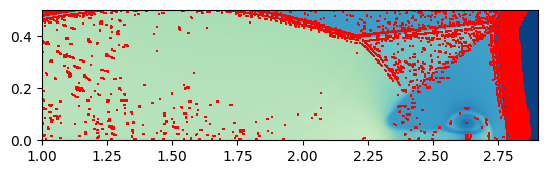

In [4]:
fig, ax = plt.subplots()

solver.plot_2d_slice(
    ax,
    param="rho",
    z=0.5,
    overlay_trouble=True,
)
ax.set_xlim(1, 2.9)
ax.set_ylim(0, 0.5)

t=0.2, x=[0.0020833333333333333, 3.997916666666667], y=[0.0020833333333333333, 0.9979166666666667], z=0.5
horizontal_axis='x', vertical_axis='y'


(0.0, 0.5)

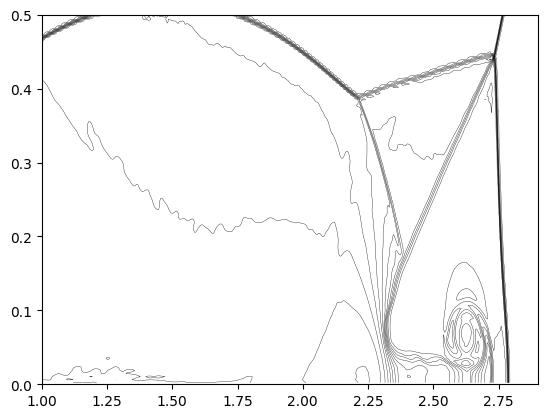

In [5]:
fig, ax = plt.subplots()

solver.plot_2d_slice(
    ax,
    param="rho",
    z=0.5,
    contour=True,
    levels=np.linspace(1.5, 22.9705, 30),
    colors="k",
    linewidths=0.25,
)
ax.set_xlim(1, 2.9)
ax.set_ylim(0, 0.5)